In [1]:
# import all the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Reading the dataset
data = pd.read_csv('height-weight.csv')

In [3]:
# display the first five rows of the dataset
print(data.head())

   Weight  Height
0      45     120
1      58     135
2      48     123
3      60     145
4      70     160


Text(0, 0.5, 'Height')

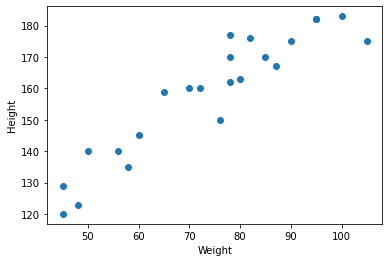

In [5]:
plt.scatter(data['Weight'], data['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [6]:
# divide the dataset into independent and dependent features
X = data[['Weight']]

Y = data['Height']

In [7]:
print(X)

    Weight
0       45
1       58
2       48
3       60
4       70
5       78
6       80
7       90
8       95
9       78
10      82
11      95
12     105
13     100
14      85
15      78
16      50
17      65
18      76
19      87
20      45
21      56
22      72


In [8]:
print(Y)

0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
14    170
15    177
16    140
17    159
18    150
19    167
20    129
21    140
22    160
Name: Height, dtype: int64


In [9]:
# divide the dataset into training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 42)

In [10]:
X.shape

(23, 1)

In [11]:
X_train.shape

(18, 1)

In [12]:
X_test.shape

(5, 1)

In [13]:
Y.shape

(23,)

In [14]:
Y_train.shape

(18,)

In [15]:
Y_test.shape

(5,)

In [16]:
X_train.head()

,Weight
12,105
1,58
13,100
5,78
2,48


In [17]:
# standardize the data in one range
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()

In [19]:
# train and transform the data
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

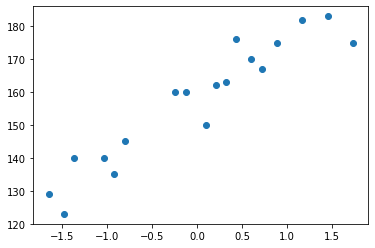

In [21]:
plt.scatter(X_train,Y_train)

In [22]:
# Train the model using Simple Linear Regression
from sklearn.linear_model import LinearRegression

In [23]:
lin = LinearRegression()

In [24]:
lin.fit(X_train, Y_train)

LinearRegression()

In [25]:
print("The slopes of the weight is :", lin.coef_)
print("Intercept is:", lin.intercept_)

The slopes of the weight is : [17.03440872]
Intercept is: 157.5


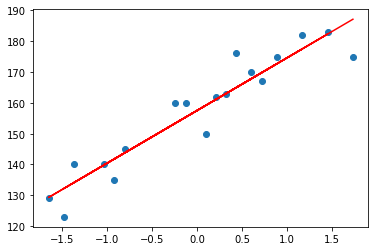

In [27]:
plt.scatter(X_train, Y_train)

plt.plot(X_train, lin.predict(X_train),'r')

# prediction of train data

predicted height output= intercept +coef_(Weights)

y_pred_train =157.5 + 17.03(X_train)



# prediction of test data

predicted height output= intercept + coef_(Weights)

y_pred_test =157.5 + 17.03(X_test)

In [29]:
y_pred_test = lin.predict(X_test)

In [30]:
print(y_pred_test, X_test)

[161.08467086 161.08467086 129.3041561  177.45645118 148.56507414] [[ 0.21043706]
 [ 0.21043706]
 [-1.6552288 ]
 [ 1.17153765]
 [-0.52452222]]


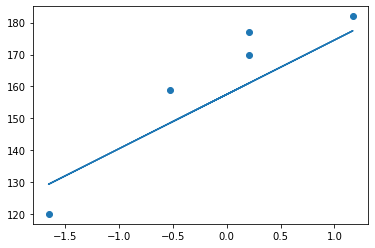

In [32]:
plt.scatter(X_test,Y_test)
plt.plot(X_test, lin.predict(X_test))

# Performance Metrics

# MSE,MAE,RMSE

# R square and adjusted R square

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(Y_test, y_pred_test)
print(mse)

109.77592599051654


In [34]:
mae = mean_absolute_error(Y_test, y_pred_test)
print(mae)

9.822657814519227


In [35]:
rmse = np.sqrt(mse)

In [36]:
print(rmse)

10.477400726827076


# R square

# Formula

# R^2 = 1 - SSR/SST

R^2 = coefficient of determination SSR = sum of squares of residuals SST = total sum of squares

In [37]:
from sklearn.metrics import r2_score
score = r2_score(Y_test, y_pred_test)
print(score)

0.7769869860423441


# Adjusted R Square

# Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]

# where:

R2: The R2 of the model n: The number of observations k: The number of predictor variables

In [39]:
#display adjusted R-squared
1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.7026493147231254

In [40]:
## new data point weight is 80
scaled_weight = scaler.transform([[80]])

In [42]:
print(scaled_weight)

[[0.32350772]]


In [48]:
lin.predict([scaled_weight[0]])

array([163.01076266])

In [49]:
print("The height prediction for weight 80 kg is :",lin.predict([scaled_weight[0]]))

The height prediction for weight 80 kg is : [163.01076266]


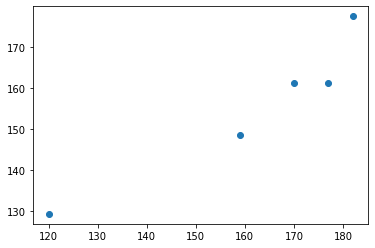

In [50]:
## Assumptions
## plot a scatter plot for the prediction
plt.scatter(Y_test, y_pred_test)

In [51]:
# Residuals
residuals = Y_test - y_pred_test


In [52]:
print(residuals)

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64


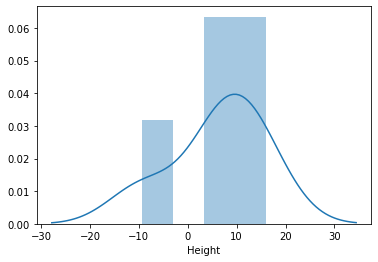

In [55]:
sns.distplot(residuals, kde = True)

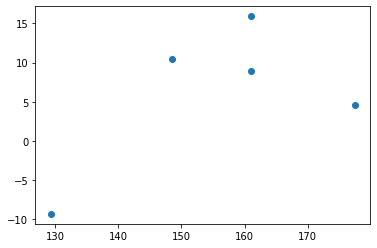

In [56]:
plt.scatter(y_pred_test, residuals)